# 1) - *Library*

In [1]:
# ==============================================
# Remove Warning
import warnings
warnings.filterwarnings('ignore')
# ==============================================
# Mathmatical Calculations
import numpy as np
# Process on Data
import pandas as pd
# Drwaing Data In Graph
import matplotlib.pyplot as plt
import seaborn as sns
# ==============================================
# ==============================================
## Preprocessing & ML Algorithm
# ==> Preprocessing
from sklearn.preprocessing import LabelEncoder , RobustScaler
# ==> Split Data
from sklearn.model_selection import train_test_split
# ==> Feature Selection
from sklearn.feature_selection import SelectKBest , chi2
# ==> Machine Learning Algorithm
from sklearn.neural_network import MLPClassifier
# ==> Metrics Score
from sklearn.metrics import confusion_matrix , classification_report

# *==============================================*

# 2) - *Data Preparation*

## *Data Exploration*

In [2]:
# Read Data
data = pd.read_csv(r'C:\Users\Dell\Artificial Intelligence\Machine Learning\ML_Projects\Online Payments Fraud Detection/PS_20174392719_1491204439457_log.csv')
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Size of data
df.shape

(6362620, 11)

In [7]:
# End 5 column in Data
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
# Information Of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Statistics for Numbers Data Only
# ==> 8 column (dtypes { float64(5) + int64(3)} )
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# *==============================================*

## *Check is null*

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# *==============================================*

## *Check is Dupicated*

In [10]:
df.duplicated().sum()

0

# *==============================================*

## *⚑ Data Analysis*

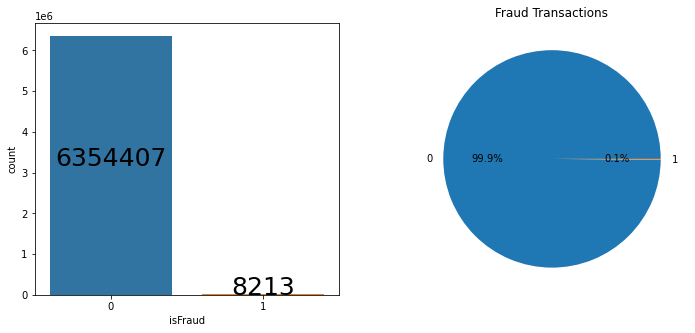

In [11]:
# Value Count For output Data
# =============================================
# Show and Arrange Figure of data
fig , axs = plt.subplots(1,2,figsize=(12,5))
# =============================================
ax_draw_value = sns.countplot(x = 'isFraud' , data = df , ax = axs[0])
for p in ax_draw_value.patches:
    ax_draw_value.text(p.get_x() + p.get_width()/2 , p.get_height()/2 , str(p.get_height()),
                      ha = 'center' , color ='black' , size = 25)
# =============================================
df['isFraud'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
axs[1].set_title('Fraud Transactions')
axs[1].set_ylabel('');

# *==============================================*

### *Visualization for [Type] Column*

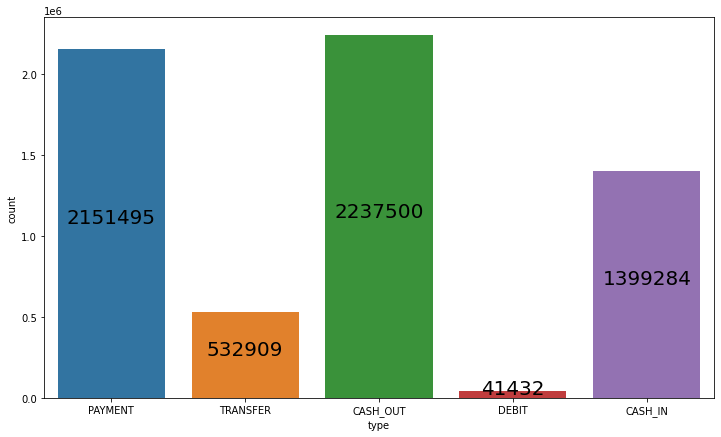

In [12]:
# Show Column [Type] in Data Frame
plt.figure(figsize=(12,7))
# =============================================
ax_draw_value = sns.countplot(x = 'type' , data = df )
for p in ax_draw_value.patches:
    ax_draw_value.text(p.get_x() + p.get_width()/2 , p.get_height()/2 , str(p.get_height()),
                      ha = 'center' , color ='black' , size = 20)

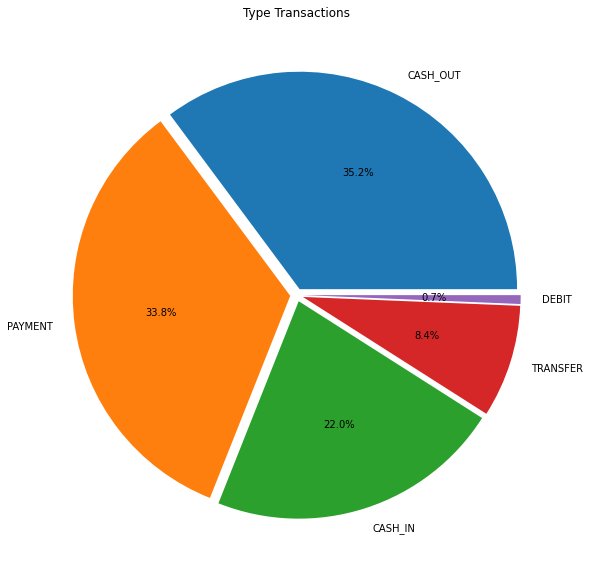

In [13]:
# Show Column [Type] in Data Frame with Graph (Pie)
plt.figure(figsize=(20,10))
shape_pie =  df['type'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',
                                explode = (0.03,0.03,0.03, 0.03, 0.03))
shape_pie.set_title('Type Transactions')
shape_pie.set_ylabel('');

# *==============================================*

### *Label Encoder*

In [14]:
lab = LabelEncoder()
df['type'] = lab.fit_transform(df['type'])

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# *==============================================*

### Correlation

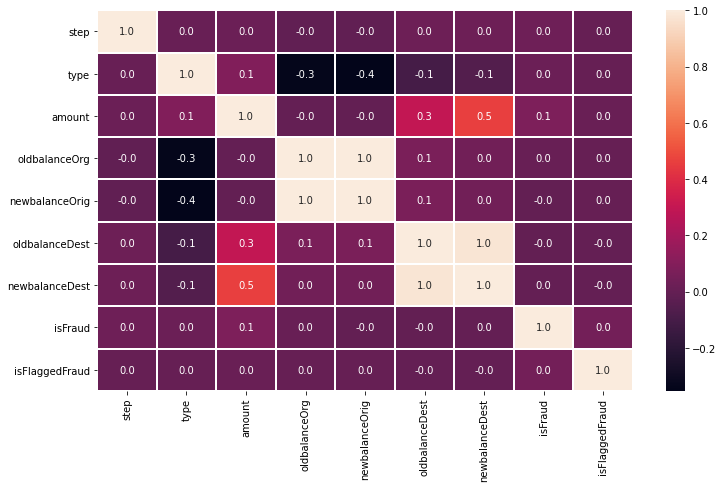

In [16]:
# Relation Between Columns [The Value]
cor = df.corr(numeric_only = True)
plt.figure(figsize=(12,7))
sns.heatmap(cor,annot = True , fmt = '.1f',linewidth=1.5);

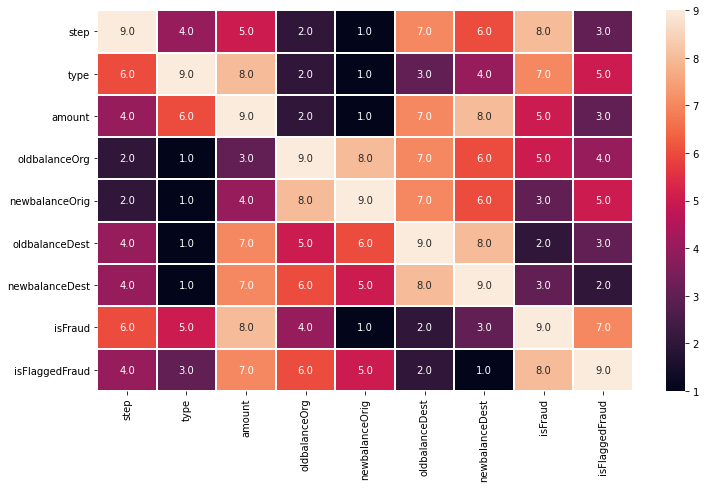

In [17]:
# Relation Between Columns [Rank]
plt.figure(figsize=(12,7))
sns.heatmap(cor.rank(axis ='columns'),annot = True , fmt = '.1f',linewidth=1.5);

## =======================================================
### [ (isFlaggedFraud & step) is unnecessary features based on correlation]
## =======================================================

In [18]:
print(cor['isFraud'].sort_values(ascending=False))
print('============================================')
print(cor['isFraud'].rank().sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64
isFraud           9.0
amount            8.0
isFlaggedFraud    7.0
step              6.0
type              5.0
oldbalanceOrg     4.0
newbalanceDest    3.0
oldbalanceDest    2.0
newbalanceOrig    1.0
Name: isFraud, dtype: float64


# *==============================================*

### Skewness

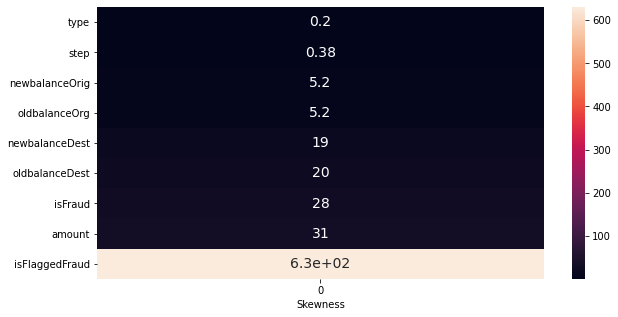

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(df.select_dtypes(exclude='object').skew().sort_values(ascending=True))
            ,annot=True,annot_kws={'fontsize': 14})
plt.xlabel('Skewness')
plt.show()

## =======================================================
### [ (isFlaggedFraud ) is unnecessary features based on Skewness]
## =======================================================

## *Data Preprocessing*

In [25]:
# Drop The Categorical Data [Text Data]
# Split Data to { Train & Test}
x = df.drop(['isFraud','nameOrig','nameDest'] , axis = 1)
y = df['isFraud']
# =================================
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


### =========================================
### Feature Selection
### =========================================

In [26]:
FeatureSelection_method = SelectKBest(score_func=chi2 ,k = 5)
X = FeatureSelection_method.fit_transform(x,y)
print('X new Shape = ', X.shape)
print('==========================')
print('Selected Feature are = ',FeatureSelection_method.get_support())

X new Shape =  (6362620, 5)
Selected Feature are =  [False False  True  True  True  True  True False]


# *==============================================*

### Dropping unnecessary features based on Feature Selection

In [27]:
x = df.drop(['isFraud','nameOrig','nameDest','step','isFlaggedFraud'] , axis = 1)
y = df['isFraud']
# =================================
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


# *==============================================*

### Data Splitting

In [28]:
# Split Data
x_train , x_test , y_train , y_test = train_test_split(x , y ,  test_size=0.2, random_state=42)
# =============================
print('Train Data')
print(x_train.shape)
print(y_train.shape)
print('\nTest Data')
print(x_test.shape)
print(y_test.shape)

Train Data
(5090096, 6)
(5090096,)

Test Data
(1272524, 6)
(1272524,)


# *==============================================*

### Data Scaling

In [29]:
# RobustScaler For Scaling
scaler = RobustScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
pd.DataFrame(x_train_scaled, columns=x.columns)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.5,1.595501,43.384227,35.067407,0.396433,-0.085389
1,-0.5,0.704709,2.054442,3.100981,0.714989,0.341184
2,1.0,-0.281166,-0.098289,0.000000,-0.140896,-0.193083
3,0.0,2.318841,1.547304,0.000000,-0.043040,0.364761
4,1.5,0.671977,-0.132155,0.000000,2.122415,1.910904
...,...,...,...,...,...,...
5090091,-0.5,0.280928,46.969152,35.955300,0.121053,-0.087795
5090092,1.0,-0.370836,-0.132155,0.000000,-0.140896,-0.193083
5090093,0.0,-0.329251,0.420275,0.337775,0.201818,0.106943
5090094,0.0,-0.009446,0.056921,0.000000,0.131045,0.103154


In [31]:
pd.DataFrame(x_test_scaled, columns=x.columns)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.5,1.307835,0.062298,2.435074,0.339502,-0.083093
1,1.0,-0.323781,0.150868,0.129860,-0.140896,-0.193083
2,-0.5,0.396413,0.861163,1.795371,0.072856,-0.148945
3,1.5,7.564164,-0.132155,0.000000,3.255257,4.082394
4,-0.5,0.016939,27.092153,20.804150,0.300641,0.110828
...,...,...,...,...,...,...
1272519,1.0,-0.378732,-0.042635,0.060259,-0.140896,-0.193083
1272520,1.0,-0.380972,-0.088513,0.029147,-0.140896,-0.193083
1272521,0.0,0.889360,-0.127430,0.000000,-0.115616,0.052026
1272522,0.0,0.640944,-0.132155,0.000000,0.485563,0.517962


# *==============================================*

# 3) - *Machine Learning Model*

In [47]:
# Confusion Matrix
def cm_design(y_test,predict_model):
        cm = confusion_matrix(y_test,predict_model)
        sns.heatmap(cm,
                    annot=True,
                    fmt='g',
                    xticklabels=['Fraud' , 'IS Fraud'],
                    yticklabels=['Fraud' , 'IS Fraud'])
        plt.xlabel('Prediction',fontsize=13)
        plt.ylabel('Actual',fontsize=13)
        plt.title('Confusion Matrix',fontsize=17)
        plt.show()

## *NN Algorithm*

In [45]:
NN_model =  MLPClassifier(hidden_layer_sizes = (128,),activation='relu',
                    solver='adam',alpha=0.0001,max_iter = 200)
NN_model.fit(x_train_scaled,y_train)
# ==============================================
y_predict_NN = NN_model.predict(x_test_scaled)
# Quick evaluation
Train_Accuracy = NN_model.score(x_train_scaled, y_train)
Test_Accuracy = NN_model.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.97 %
Testing accuracy: 99.97 %


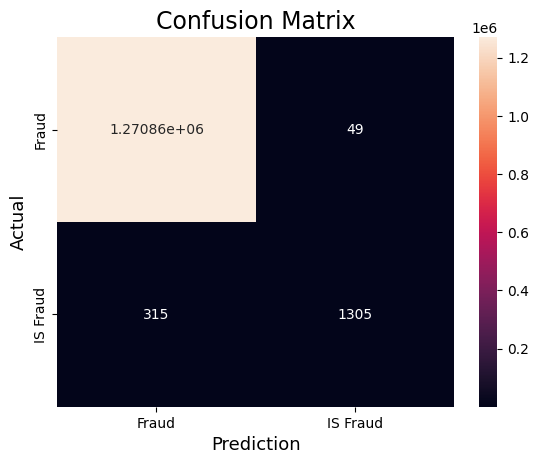

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.81      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

F1 Score :  87.76 %



In [48]:
cm_design(y_test,y_predict_NN)
print(classification_report(y_test, y_predict_NN))

# Evaluation Metric Libraries
from sklearn.metrics import f1_score
# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NN = f1_score(y_test, y_predict_NN)
print(f'F1 Score : {F1_Score_NN * 100 : .2f} %\n')